In [28]:
import numpy as np

In [29]:
import pandas as pd

In [30]:
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

In [32]:
aapl= pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
amzn= pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)
cisco= pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm= pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)


In [33]:
stocks= pd.concat([aapl,amzn,cisco,ibm],axis=1)

In [34]:
stocks.columns=['Apple','Amazon','Cisco','IBM']

<AxesSubplot:xlabel='Date'>

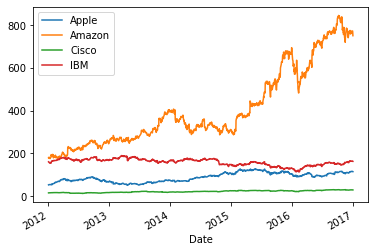

In [35]:
stocks.plot()

In [36]:
stocks['Mean Daily Returns']=stocks.pct_change(1).mean()

In [37]:
stocks

,Apple,Amazon,Cisco,IBM,Mean Daily Returns
Date,,,,,
2012-01-03,53.063218,179.03,15.752778,160.830881,NaN
2012-01-04,53.348386,177.51,16.057180,160.174781,NaN
2012-01-05,53.940658,177.61,15.997991,159.415086,NaN
2012-01-06,54.504543,182.61,15.938801,157.584912,NaN
2012-01-09,54.418089,178.56,16.040268,156.764786,NaN
...,...,...,...,...,...
2016-12-23,115.547742,760.59,29.730928,163.790152,NaN
2016-12-27,116.281568,771.40,29.877002,164.212620,NaN
2016-12-28,115.785740,772.13,29.623807,163.279259,NaN


In [39]:
stocks.drop('Mean Daily Returns',axis=1,inplace=True)

In [40]:
stocks.pct_change(1).corr()

,Apple,Amazon,Cisco,IBM
Apple,1.000000,0.235487,0.301990,0.297498
Amazon,0.235487,1.000000,0.284470,0.258492
Cisco,0.301990,0.284470,1.000000,0.424672
IBM,0.297498,0.258492,0.424672,1.000000


In [41]:
log_ret = np.log(stocks/stocks.shift(1))

In [42]:
log_ret

,Apple,Amazon,Cisco,IBM
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,-0.008526,0.019139,-0.004088
2012-01-05,0.011041,0.000563,-0.003693,-0.004754
2012-01-06,0.010400,0.027763,-0.003707,-0.011547
2012-01-09,-0.001587,-0.022428,0.006346,-0.005218
...,...,...,...,...
2016-12-23,0.001976,-0.007531,0.002295,-0.002097
2016-12-27,0.006331,0.014113,0.004901,0.002576
2016-12-28,-0.004273,0.000946,-0.008511,-0.005700


In [43]:
stocks.pct_change(1)

,Apple,Amazon,Cisco,IBM
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.008490,0.019324,-0.004079
2012-01-05,0.011102,0.000563,-0.003686,-0.004743
2012-01-06,0.010454,0.028152,-0.003700,-0.011481
2012-01-09,-0.001586,-0.022178,0.006366,-0.005204
...,...,...,...,...
2016-12-23,0.001978,-0.007503,0.002298,-0.002095
2016-12-27,0.006351,0.014213,0.004913,0.002579
2016-12-28,-0.004264,0.000946,-0.008475,-0.005684


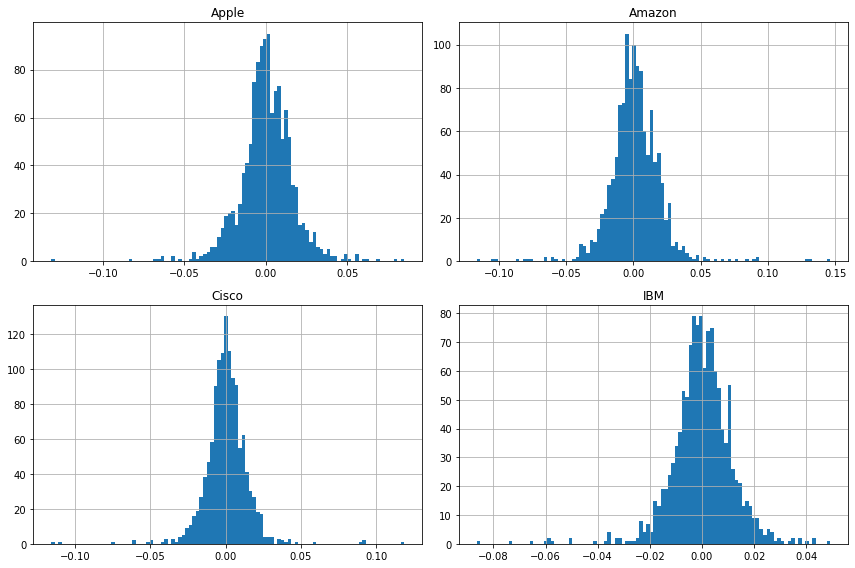

In [44]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [45]:
log_ret.mean()

Apple     0.000614
Amazon    0.001139
Cisco     0.000497
IBM       0.000011
dtype: float64

In [46]:
log_ret.corr()

,Apple,Amazon,Cisco,IBM
Apple,1.000000,0.236312,0.301328,0.294922
Amazon,0.236312,1.000000,0.286434,0.259051
Cisco,0.301328,0.286434,1.000000,0.423915
IBM,0.294922,0.259051,0.423915,1.000000


In [47]:
log_ret.cov()*252

,Apple,Amazon,Cisco,IBM
Apple,0.068326,0.018986,0.017854,0.014464
Amazon,0.018986,0.094470,0.019956,0.014939
Cisco,0.017854,0.019956,0.051381,0.018029
IBM,0.014464,0.014939,0.018029,0.035203


In [48]:
np.random.seed(101)
print(stocks.columns)

print('Weight:')
weights= np.array(np.random.random(4))
print(weights)

weights= weights/np.sum(weights)

print(weights)

Index(['Apple', 'Amazon', 'Cisco', 'IBM'], dtype='object')
Weight:
[0.51639863 0.57066759 0.02847423 0.17152166]
[0.40122278 0.44338777 0.02212343 0.13326603]


In [49]:
weights.sum()

1.0000000000000002

In [50]:
exp_ret= np.sum((log_ret.mean()*weights)*252)

In [51]:
exp_ret

0.19257413230950263

In [52]:
#expected volatility

print('Expected Volatility:')
exp_vol= np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print(exp_vol)

Expected Volatility:
0.20273990622326796


In [53]:
#Sharpe Ratio

SR=exp_ret/exp_vol
print(SR)

0.9498580516133305


In [68]:
np.random.seed(101)
num_ports=25000
all_weights= np.zeros((num_ports, len(stocks.columns)))
ret_array= np.zeros(num_ports)
vol_array= np.zeros(num_ports)
sharpe_array= np.zeros(num_ports)


for ind in range(num_ports):
    weights= np.array(np.random.random(4))
    weights= weights/np.sum(weights)
    
    #save weights
    
    all_weights[ind,:]= weights
    
    ret_array[ind]= np.sum((log_ret.mean()*weights)*252)
    #expected volatility

    vol_array[ind]= np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    #Sharpe Ratio

    sharpe_array[ind]=ret_array[ind]/vol_array[ind]

In [69]:
sharpe_array.max()

1.029329177889919

In [70]:
sharpe_array.min()

0.12181973493238273

In [71]:
sharpe_array.argmax()

15783

In [74]:
all_weights[15783,:]

array([0.29691701, 0.52340989, 0.17805162, 0.00162149])

In [76]:
max_sr_ret= ret_array[sharpe_array.argmax()]
max_sr_vol= vol_array[sharpe_array.argmax()]

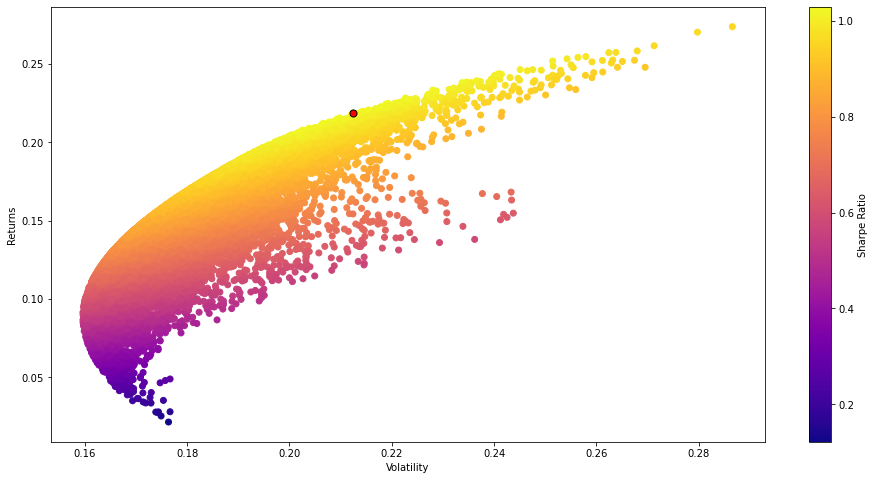

In [77]:
plt.figure(figsize=(16,8))
plt.scatter(vol_array, ret_array, c=sharpe_array, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.ylabel("Returns")
plt.xlabel("Volatility")
plt.scatter(max_sr_vol,max_sr_ret , c='red', edgecolors='black', s=50)

In [79]:
def get_ret_vol_sr(weights):
    weights=np.array(weights)
    ret= np.sum(log_ret.mean()*weights)*252
    vol= np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr= ret/vol
    return np.array([ret,vol,sr])

In [81]:
from scipy.optimize import minimize

In [83]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*-1

In [84]:
def check_sum(weights):
    return np.sum(weights)-1

In [85]:
cons = ({'type':'eq', 'fun': check_sum})

In [86]:
bounds =((0,1),(0,1),(0,1),(0,1))

In [87]:
init_guess= [0.25,0.25,0.25,0.25]

In [89]:
opt_results= minimize(neg_sharpe, init_guess, method='SLSQP',bounds=bounds, constraints= cons )

In [90]:
opt_results

     fun: -1.030716870336306
     jac: array([ 5.64306974e-05, -4.44799662e-05,  4.18275595e-05,  3.39921728e-01])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628978, 0.52952042, 0.2041898 , 0.        ])

In [91]:
opt_results.x

array([0.26628978, 0.52952042, 0.2041898 , 0.        ])

In [92]:
get_ret_vol_sr(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

In [94]:
frontier_y= np.linspace(0,0.3,100)

In [102]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [103]:
frontier_volatility= []

for possible_return in frontier_y:
    cons=({'type':'eq', 'fun':check_sum, },
         {'type':'eq', 'fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    result= minimize(minimize_vol, init_guess, method='SLSQP',bounds=bounds, constraints= cons )
    frontier_volatility.append(result['fun'])

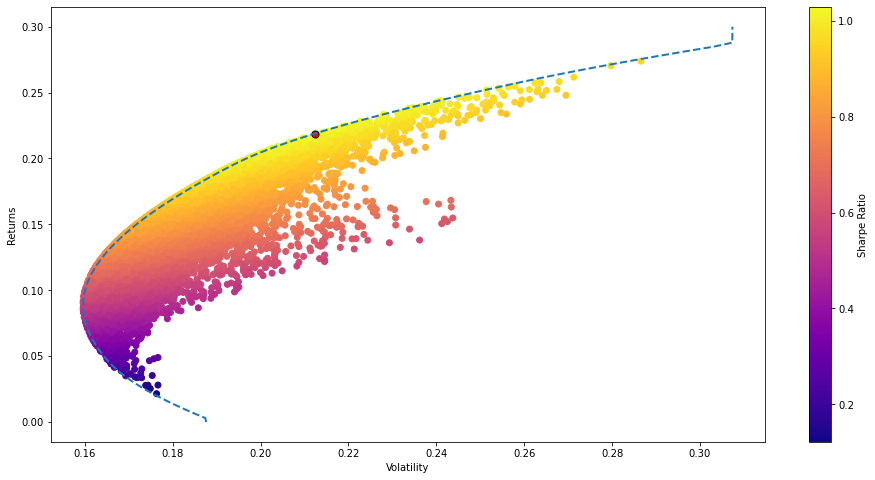

In [107]:
plt.figure(figsize=(16,8))
plt.scatter(vol_array, ret_array, c=sharpe_array, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.ylabel("Returns")
plt.xlabel("Volatility")
plt.scatter(max_sr_vol,max_sr_ret , c='red', edgecolors='black', s=50)
plt.plot(frontier_volatility, frontier_y, '--', linewidth=2)